In [1]:
import subprocess
from pathlib import Path
from sheet import get_pdf_pages_of_book
from pdfs import extract_images
from transcriptions import get_images_from_transcription
from sheet import get_sheet_record, parse_sheet
import tempfile
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def show_transcribed_images(our_identifier):

    transcribe_dir = Path(f"../data/transcriptions/{our_identifier}/")
    for transcribe_fn in transcribe_dir.iterdir():
        if transcribe_fn.name.startswith('transcribe'):
            transcribed_images = get_images_from_transcription(str(transcribe_fn))
            for i,transcribed_image in enumerate(transcribed_images):
                fig, ax = plt.subplots(figsize=(15,5))
                ax.imshow(np.asarray(transcribed_image)[:750,:])
                ax.set(title=f"TRANSCRIPTION ### {i}{transcribe_fn} ###")

def show_images(pdf_path):
    pdf_file_name = Path(pdf_path).name
    identifier = Path(pdf_path).stem
    sheet_record = get_sheet_record(pdf_file_name)
    
    our_identifiers = sheet_record.identifier
    if isinstance(our_identifiers, str):
        our_identifiers = [our_identifiers]
        
    for our_identifier in our_identifiers:
        show_transcribed_images(our_identifier)

    pages = get_pdf_pages_of_book(pdf_file_name)
    images = extract_images(pdf_path)
    for (page,image) in images:
        image = np.asarray(image)
        fig, ax = plt.subplots(figsize=(15,5))
        ax.imshow(np.asarray(image)[:750,:])
        ax.set(title=f"PDF PAGE ### {page} ###")

In [3]:
pdf_base_path = '../data/pdf_renamed/'
sheet = parse_sheet('../data/sheet/corpus-scott-shakespeare-translations.tsv')
sheet.head()

,title,pdf_name,pdf_renamed,identifier,book_url,pdf_pages,printed_page_number,partner_institution,institution_contact
0,William Shakspeare's sämtliche dramatische Wer...,William_Shakspeare_s_sämtliche_dramatis.pdf,HCRMAAAAcAAJ.pdf,de_ende_oelk,https://books.google.de/books?id=HCRMAAAAcAAJ,"[225, 230, 237]","[913, 918, 925]",Bayerische Staatsbibliothek,https://www.bsb-muenchen.de/?id=40
1,"Das gefährliche Schloß, Bände 1-3",Das_gefährliche_Schloß.pdf,3pVMAAAAcAAJ.pdf,de_schl,https://books.google.de/books?id=3pVMAAAAcAAJ,"[92, 239, 261]","[94, 241, 263]",Bayerische Staatsbibliothek,https://www.bsb-muenchen.de/?id=40
2,Anna von Geierstein oder das Nebelmädchen: Ein...,Anna_von_Geierstein_oder_das_Nebelmädch.pdf,D5pMAAAAcAAJ.pdf,de_anna,https://books.google.de/books?id=D5pMAAAAcAAJ,"[74, 90, 143]","[76, 92, 145]",Bayerische Staatsbibliothek,https://www.bsb-muenchen.de/?id=40
3,Woodstock oder der Ritter: Eine Erzählung aus ...,Woodstock_oder_der_Ritter.pdf,7JVMAAAAcAAJ.pdf,de_wood,https://books.google.de/books?id=7JVMAAAAcAAJ,"[21, 48, 60]","[23, 50, 62]",Bayerische Staatsbibliothek,https://www.bsb-muenchen.de/?id=40
4,William Shakspeares sämmtliche dramatische Wer...,William_Shakspeares_sämmtliche_dramatis.pdf,AdiKyqdlp4cC.pdf,de_verl_suse,https://books.google.de/books?id=AdiKyqdlp4cC,"[212, 263, 290]","[212, 263, 290]",Biblioteca Statale Isontina Gorizia,bs-ison.prestitointerbibliotecario@benicultura...


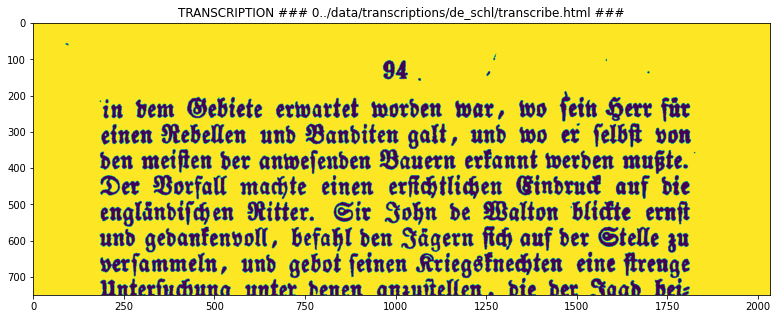

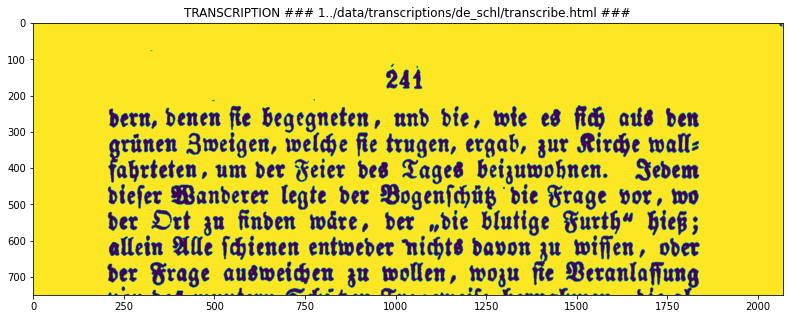

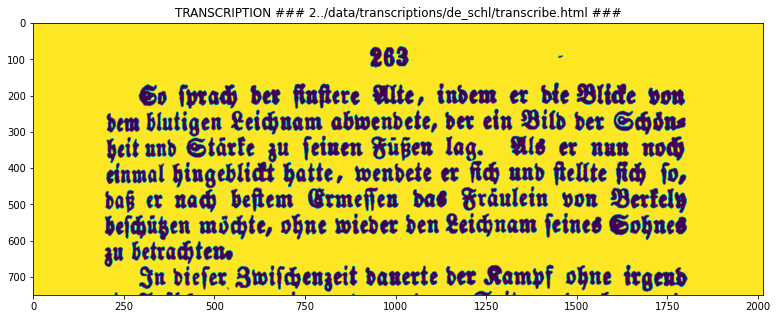

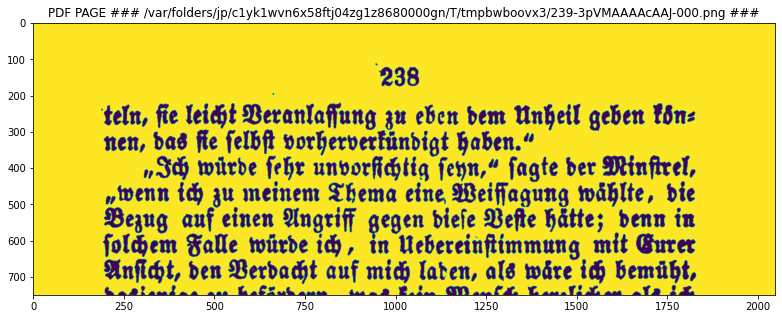

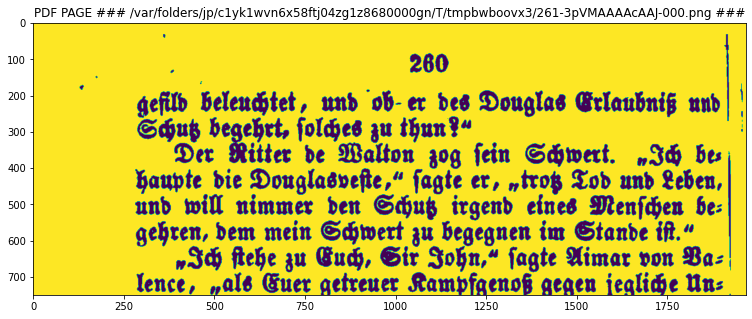

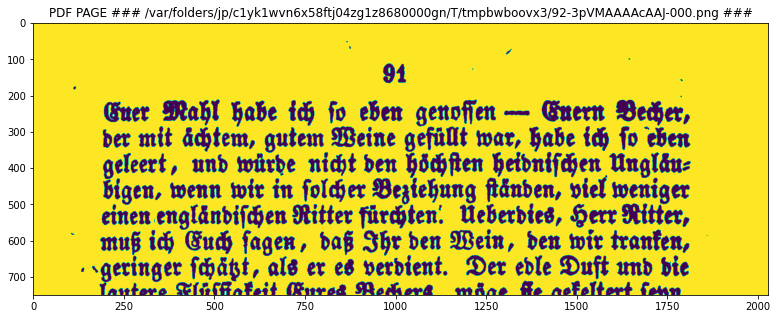

In [15]:
# show_images(pdf_base_path + 'HCRMAAAAcAAJ.pdf')
# show_images(pdf_base_path + '3pVMAAAAcAAJ.pdf')
# show_images(pdf_base_path + 'D5pMAAAAcAAJ.pdf')
# show_images(pdf_base_path + '7JVMAAAAcAAJ.pdf')
# show_images(pdf_base_path + 'AdiKyqdlp4cC.pdf')
# show_images(pdf_base_path + '_QgOAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'fAoOAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'wggOAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'kggOAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'PzMJAAAAQAAJ.pdf')
# show_images(pdf_base_path + '1VUJAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'rDUJAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'MzQJAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'Fy4JAAAAQAAJ.pdf')
# show_images(pdf_base_path + 'YAZXAAAAcAAJ.pdf')
# show_images(pdf_base_path + '8AQoAAAAYAAJ.pdf')
# show_images(pdf_base_path + 'J4knAAAAMAAJ.pdf')
# show_images(pdf_base_path + '2jMfAAAAMAAJ.pdf')
# show_images(pdf_base_path + 'u4cnAAAAMAAJ.pdf')
# show_images(pdf_base_path + '4zQfAAAAMAAJ.pdf')
# show_images(pdf_base_path + 'WjMfAAAAMAAJ.pdf')
# show_images(pdf_base_path + 'zviTtwEACAAJ.pdf')
# show_images(pdf_base_path + 'zDTMtgEACAAJ.pdf')
# show_images(pdf_base_path + 'quentindurward01scotuoft.pdf')
# show_images(pdf_base_path + 'quentindurward02scotuoft.pdf')
# show_images(pdf_base_path + 'chroniclesofcano02scot.pdf')
# show_images(pdf_base_path + 'chroniclesofcano03scot.pdf')
# show_images(pdf_base_path + 'anneofgeierstein02scot.pdf')
# show_images(pdf_base_path + 'anneofgeierstein03scot.pdf')
# show_images(pdf_base_path + 'XtEyAQAAMAAJ.pdf')
# show_images(pdf_base_path + '8dAyAQAAMAAJ.pdf')
# show_images(pdf_base_path + 'oNEyAQAAMAAJ.pdf')
# show_images(pdf_base_path + 't88yAQAAMAAJ.pdf')
# show_images(pdf_base_path + 'aNQwAQAAMAAJ.pdf')
# show_images(pdf_base_path + 'htQwAQAAMAAJ.pdf')
# show_images(pdf_base_path + 'DNUwAQAAMAAJ.pdf')
# show_images(pdf_base_path + 'H9UwAQAAMAAJ.pdf')